# ch05 불리언 인덱싱

- 데이터셋으로부터 데이터를 필터링하는 것은 가장 흔하고 기본적인 연산이다.
- pandas에는 불리언 인덱싱을 사용해 데이터를 필터링하거나 부분 집합을 만드는 다양한 방법이 존재한다.
- 불리언 인덱싱(or boolean selection)은 pandas에서 불리언 값을 사용해 행을 선택하는 방법을 의미한다.
- DataFrame의 하나 이상의 col에 불리언 조건을 적용하여 생성한다.

In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series

## 1. 불리언 통계량 계산
- 불리언 Series를 처음 생성할 때는 기본 요약 통계량을 살펴보는 것이 좋다.
- 불리언 Series의 각 값은 0 또는 1이므로 수치 데이터와 작동하는 모든 Series 메서드는 불리언에도 작동한다.

In [2]:
movie = pd.read_csv('../data/movie.csv', index_col='movie_title')

In [3]:
movie.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
movie_title,,,,,,,,,,,,,,,,,,,,,
Avatar,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
Pirates of the Caribbean: At World's End,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
Spectre,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
The Dark Knight Rises,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
Star Wars: Episode VII - The Force Awakens,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


- 비교 연산자를 사용하여 영화 상영 시간이 두 시간을 넘지는 확인한다.

In [4]:
movie_2_hours = movie['duration'] > 120

In [5]:
movie_2_hours.head()

movie_title
Avatar                                         True
Pirates of the Caribbean: At World's End       True
Spectre                                        True
The Dark Knight Rises                          True
Star Wars: Episode VII - The Force Awakens    False
Name: duration, dtype: bool

- 두 시간 이상인 영화 개수

In [6]:
movie_2_hours.sum()

1039

- 전체 영화 리스트 중 두 시간 이상인 비율

In [7]:
movie_2_hours.mean()

0.2113506916192026

- duration col에 누락값이 존재한다.
- 불리언 조건은 누락값을 무조건 False로 반환한다.
- 평균을 구하려면 누락값을 삭제할 필요가 있다.

In [8]:
movie['duration'].dropna().gt(120).mean()

0.21199755152009794

- describe() 메서드를 사용하여 불리언 Series에 대한 요약 통계량을 확인할 수 있다.

In [9]:
movie_2_hours.describe()

count      4916
unique        2
top       False
freq       3877
Name: duration, dtype: object

- 불리언 Series의 평균값이 True 값의 %라는 것을 증명할 수 있다.

In [10]:
movie_2_hours.value_counts(normalize=True)

False    0.788649
True     0.211351
Name: duration, dtype: float64

- 동일한 DataFrame 내의 두 col을 비교해 불리언 Series를 생성하는 것도 가능하다.
- col2를 모두 산택한 후 누락값이 있는 row를 삭제하고 비교 후 평균을 계산한다.

- 배우 1이 배우 2보다 더 많은 페이스북 좋아요를 가진 비율

In [11]:
actors = movie[['actor_1_facebook_likes', 'actor_2_facebook_likes']].dropna()

In [12]:
actors.isnull().sum()

actor_1_facebook_likes    0
actor_2_facebook_likes    0
dtype: int64

In [13]:
(actors['actor_1_facebook_likes'] > actors['actor_2_facebook_likes']).mean()

0.9777687130328371

## 2. 다중 불리언 조건 구축

- 파이썬에서 불리언 표현은 and, or, not을 사용한다.
- pandas의 불리언 연산은 &, |, ~ 으로 대체된다.

- 영화 데이터셋을 읽어 들이고, 영화 제목을 index로 설정한다.

In [14]:
movie = pd.read_csv('../data/movie.csv', index_col='movie_title')

- 각 조건을 각각의 불리언 Series로 저장할 변수를 생성한다.

In [15]:
criteria1 = movie.imdb_score > 8

In [21]:
criteria2 = movie.content_rating == 'PG-13'

In [18]:
criteria3 = ((movie.title_year < 2000) | (movie.title_year > 2009))

In [19]:
criteria1.head()

movie_title
Avatar                                        False
Pirates of the Caribbean: At World's End      False
Spectre                                       False
The Dark Knight Rises                          True
Star Wars: Episode VII - The Force Awakens    False
Name: imdb_score, dtype: bool

In [22]:
criteria2.head()

movie_title
Avatar                                        True
Pirates of the Caribbean: At World's End      True
Spectre                                       True
The Dark Knight Rises                         True
Star Wars: Episode VII - The Force Awakens    True
Name: content_rating, dtype: bool

In [23]:
criteria3.head()

movie_title
Avatar                                        False
Pirates of the Caribbean: At World's End      False
Spectre                                        True
The Dark Knight Rises                          True
Star Wars: Episode VII - The Force Awakens    False
Name: title_year, dtype: bool

In [24]:
criteria_final = criteria1 & criteria2 & criteria3

In [25]:
criteria_final.head()

movie_title
Avatar                                        False
Pirates of the Caribbean: At World's End      False
Spectre                                       False
The Dark Knight Rises                          True
Star Wars: Episode VII - The Force Awakens    False
dtype: bool

- pandas에서는 논리 연산자에 다른 문법을 사용하면 연산자 우선순위가 달라진다.
- 파이썬의 비교 연산자는 and, or, not 보다 우선순위가 높다.
- 그러나 pandas의 새 연산자들(&, |, ~)은 오히려 비교 연산자보다도 더 우선순위가 높다.

In [26]:
5 < 10

True

In [27]:
3 > 4

False

In [28]:
5 < 10 and 3 > 4

False

## 3. 불리언 인덱싱을 사용한 필터링

- Series와 DataFrame 객체에서 불리언 선택을 하는 방법은 동일하다.
- 필터링하려는 객체와 동일하게 인덱스된 불리언 Series를 인덱스 연산자에 전달하면 된다.

In [29]:
movie = pd.read_csv('../data/movie.csv', index_col='movie_title')

In [30]:
crit_a1 = movie.imdb_score > 8
crit_a2 = movie.content_rating == 'PG-13'
crit_a3 = ((movie.title_year < 2000) | (movie.title_year > 2009))
final_crit_a = crit_a1 & crit_a2 & crit_a3

In [31]:
crit_b1 = movie.imdb_score < 5
crit_b2 = movie.content_rating == 'R'
crit_b3 = ((movie.title_year >= 2000) | (movie.title_year <= 2010))
final_crit_b = crit_b1 & crit_b2 & crit_b3

- pandas의 or 연산자를 사용해 두 조건 집합을 병합한다.
- 두 집합 중 하나에 속하는 모든 영화의 불리언 Series가 생성된다.

In [32]:
final_crit_all = final_crit_a | final_crit_b

In [33]:
final_crit_all.head()

movie_title
Avatar                                        False
Pirates of the Caribbean: At World's End      False
Spectre                                       False
The Dark Knight Rises                          True
Star Wars: Episode VII - The Force Awakens    False
dtype: bool

- 불리언 Series가 생성됐으므로 데이터를 필터링하기 위해 index operator에 전달한다.

In [34]:
movie[final_crit_all].head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
movie_title,,,,,,,,,,,,,,,,,,,,,
The Dark Knight Rises,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
The Avengers,Color,Joss Whedon,703.0,173.0,0.0,19000.0,Robert Downey Jr.,26000.0,623279547.0,Action|Adventure|Sci-Fi,...,1722.0,English,USA,PG-13,220000000.0,2012.0,21000.0,8.1,1.85,123000
Captain America: Civil War,Color,Anthony Russo,516.0,147.0,94.0,11000.0,Scarlett Johansson,21000.0,407197282.0,Action|Adventure|Sci-Fi,...,1022.0,English,USA,PG-13,250000000.0,2016.0,19000.0,8.2,2.35,72000
The Lovers,Color,Roland Joffé,10.0,109.0,596.0,283.0,Alice Englert,622.0,NaN,Action|Adventure|Romance|Sci-Fi,...,15.0,English,Belgium,R,NaN,2015.0,525.0,4.5,NaN,677
Guardians of the Galaxy,Color,James Gunn,653.0,121.0,571.0,3000.0,Vin Diesel,14000.0,333130696.0,Action|Adventure|Sci-Fi,...,1097.0,English,USA,PG-13,170000000.0,2014.0,14000.0,8.1,2.35,96000


- 검증해보기 위해 .loc indexer를 사용하여 row와 col을 필터링해본다.

In [35]:
cols = ['imdb_score', 'content_rating', 'title_year']

In [36]:
movie_filtered = movie.loc[final_crit_all, cols]

In [37]:
movie_filtered.head(10)

,imdb_score,content_rating,title_year
movie_title,,,
The Dark Knight Rises,8.5,PG-13,2012.0
The Avengers,8.1,PG-13,2012.0
Captain America: Civil War,8.2,PG-13,2016.0
The Lovers,4.5,R,2015.0
Guardians of the Galaxy,8.1,PG-13,2014.0
Interstellar,8.6,PG-13,2014.0
Inception,8.8,PG-13,2010.0
The Martian,8.1,PG-13,2015.0
Town & Country,4.4,R,2001.0


- 각 불리언 표현식에 별도의 변수를 할당할 필요는 없지만, 별도의 변수를 사용하면 가독성이 올라가고 디버그가 편해지는 장점이 있다.

## 4. 인덱스 선택을 통한 불리언 인덱싱 복제

- 대학 데이터셋을 읽어 들인 후 불리언 인덱싱을 사용하여 텍사스 주에 있는 모든 대학을 선택한다.

In [38]:
college = pd.read_csv('../data/college.csv')

In [39]:
college[college['STABBR'] == 'TX'].head()

,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
3610,Abilene Christian University,Abilene,TX,0.0,0.0,0.0,1,530.0,545.0,0.0,...,0.0454,0.0423,0.0045,0.0468,1,0.2595,0.5527,0.0381,40200,25985
3611,Alvin Community College,Alvin,TX,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0002,0.0000,0.0143,0.7123,1,0.1549,0.0625,0.2841,34500,6750
3612,Amarillo College,Amarillo,TX,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0000,0.0001,0.0085,0.6922,1,0.3786,0.1573,0.3431,31700,10950
3613,Angelina College,Lufkin,TX,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0264,0.0005,0.0000,0.5600,1,0.5308,0.0000,0.2603,26900,PrivacySuppressed
3614,Angelo State University,San Angelo,TX,0.0,0.0,0.0,0,475.0,490.0,0.0,...,0.0285,0.0331,0.0011,0.1289,1,0.4068,0.5279,0.1407,37700,21319.5


- 인덱스 선택을 사용해 복제하기 위해 STABBR col의 정보를 인덱스로 이동한다.
- 그 다음 레이블에 기초한 선택을 위해 .loc indexer를 사용한다.

In [40]:
college2 = college.set_index('STABBR')

In [41]:
college2.loc['TX'].head()

,INSTNM,CITY,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,UGDS,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
STABBR,,,,,,,,,,,,,,,,,,,,,
TX,Abilene Christian University,Abilene,0.0,0.0,0.0,1,530.0,545.0,0.0,3572.0,...,0.0454,0.0423,0.0045,0.0468,1,0.2595,0.5527,0.0381,40200,25985
TX,Alvin Community College,Alvin,0.0,0.0,0.0,0,NaN,NaN,0.0,4682.0,...,0.0002,0.0000,0.0143,0.7123,1,0.1549,0.0625,0.2841,34500,6750
TX,Amarillo College,Amarillo,0.0,0.0,0.0,0,NaN,NaN,0.0,9346.0,...,0.0000,0.0001,0.0085,0.6922,1,0.3786,0.1573,0.3431,31700,10950
TX,Angelina College,Lufkin,0.0,0.0,0.0,0,NaN,NaN,0.0,3825.0,...,0.0264,0.0005,0.0000,0.5600,1,0.5308,0.0000,0.2603,26900,PrivacySuppressed
TX,Angelo State University,San Angelo,0.0,0.0,0.0,0,475.0,490.0,0.0,5290.0,...,0.0285,0.0331,0.0011,0.1289,1,0.4068,0.5279,0.1407,37700,21319.5


- 두 가지 방법의 속도를 측정해본다.

In [42]:
%timeit college[college['STABBR'] == 'TX']

1.31 ms ± 2.26 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [43]:
%timeit college2.loc['TX']

520 µs ± 4.69 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


- 불리언 인덱싱이 인덱스 선택에 비해 3배 정도 더 오래 걸린다.
- 인덱스 설정을 감안해도 불리언 인덱싱이 훨씬 더 오래 걸린다.

In [45]:
%timeit college2 = college.set_index('STABBR')

1.13 ms ± 4.37 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


- 불리언 인덱싱을 만들려면 STABBR이 TX인 열을 검색해 불리언 Series를 생성한다.
- 이 Series를 인덱스 연산자에 전달하여 데이터를 부분 집합으로 만든다.

- 이 과정을 동일한 열을 인덱스로 옮긴 후 레이블 기반의 인덱스 선택을 .loc를 사용해 수행하면 동일하게 처리할 수 있다.
- 인덱스를 통한 선택이 불리언 인덱싱에 비해 훨씬 더 빠르다.

- 불리언 인덱싱이나 인덱스 선택 모두 복수 개의 col을 사용한 선택도 가능하다.
- 불리언 인덱싱은 isin() 메서드를 사용한다.
- 인덱스는 .loc에 리스트를 전달하면 된다.

In [46]:
states = ['TX', 'CA', 'NY']

In [48]:
college[college['STABBR'].isin(states)].head()

,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
192,Academy of Art University,San Francisco,CA,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0249,0.2523,0.2098,0.4334,1,0.4008,0.5524,0.4043,36000,35093
193,ITT Technical Institute-Rancho Cordova,Rancho Cordova,CA,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0400,0.0000,0.1780,0.2540,0,0.7137,0.7667,0.7235,38800,25827.5
194,Academy of Chinese Culture and Health Sciences,Oakland,CA,0.0,0.0,0.0,0,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,PrivacySuppressed
195,The Academy of Radio and TV Broadcasting,Huntington Beach,CA,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0000,0.0000,0.0000,0.0000,1,0.9579,1.0000,0.4545,28400,9500
196,Avalon School of Cosmetology-Alameda,Alameda,CA,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0553,0.0000,0.0435,0.5099,1,0.7407,0.6768,0.3387,21600,9860


In [50]:
college2.loc[states].head()

,INSTNM,CITY,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,UGDS,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
STABBR,,,,,,,,,,,,,,,,,,,,,
TX,Abilene Christian University,Abilene,0.0,0.0,0.0,1,530.0,545.0,0.0,3572.0,...,0.0454,0.0423,0.0045,0.0468,1,0.2595,0.5527,0.0381,40200,25985
TX,Alvin Community College,Alvin,0.0,0.0,0.0,0,NaN,NaN,0.0,4682.0,...,0.0002,0.0000,0.0143,0.7123,1,0.1549,0.0625,0.2841,34500,6750
TX,Amarillo College,Amarillo,0.0,0.0,0.0,0,NaN,NaN,0.0,9346.0,...,0.0000,0.0001,0.0085,0.6922,1,0.3786,0.1573,0.3431,31700,10950
TX,Angelina College,Lufkin,0.0,0.0,0.0,0,NaN,NaN,0.0,3825.0,...,0.0264,0.0005,0.0000,0.5600,1,0.5308,0.0000,0.2603,26900,PrivacySuppressed
TX,Angelo State University,San Angelo,0.0,0.0,0.0,0,475.0,490.0,0.0,5290.0,...,0.0285,0.0331,0.0011,0.1289,1,0.4068,0.5279,0.1407,37700,21319.5


- pandas는 인덱스를 고유한 것인지, 정렬된 것인지에 따라 다르게 구현하고 있다.

## 5. 정렬된 고유 인덱스를 사용한 선택

- 인덱스 선택의 성능은 인덱스가 고유하거나 정렬되어 있을 때 아주 빨라진다.

- 대학 데이터셋을 읽어들인 후 STABBR을 인덱스로 하는 별도의 DataFrame을 생성한 후 인덱스가 정렬되어 있는지 검사해본다.

In [51]:
college = pd.read_csv('../data/college.csv')

In [52]:
college2 = college.set_index('STABBR')

In [53]:
college2.index.is_monotonic

False

- college2의 인덱스를 정렬하여 또 다른 객체에 저장한다.

In [54]:
college3 = college2.sort_index()

In [55]:
college3.index.is_monotonic

True

- 세 가지 DataFrame에서 텍사스 주를 선택하는 시간을 측정해보자.

In [56]:
%timeit college[college['STABBR'] == 'TX']

1.31 ms ± 10.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [57]:
%timeit college2.loc['TX']

522 µs ± 3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [58]:
%timeit college3.loc['TX']

179 µs ± 930 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


- 정렬된 인덱스의 성능은 불리언 선택에 비해 매우 빠르다.

In [59]:
college_unique = college.set_index("INSTNM")

In [61]:
college_unique.index.is_unique

True

- 특정 대학을 불리언 인덱싱으로 선택해보자.

In [63]:
college[college['INSTNM'] == 'Stanford University']

,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
4217,Stanford University,Stanford,CA,0.0,0.0,0.0,0,730.0,745.0,0.0,...,0.1067,0.0819,0.0031,0.0,1,0.1556,0.1256,0.0401,86000,12782


- 인덱스 선택을 통해 동일한 대학을 선택해보자.

In [62]:
college_unique.loc['Stanford University']

CITY                  Stanford
STABBR                      CA
HBCU                         0
MENONLY                      0
WOMENONLY                    0
RELAFFIL                     0
SATVRMID                   730
SATMTMID                   745
DISTANCEONLY                 0
UGDS                      7018
UGDS_WHITE              0.3752
UGDS_BLACK              0.0591
UGDS_HISP               0.1607
UGDS_ASIAN              0.1979
UGDS_AIAN               0.0114
UGDS_NHPI               0.0038
UGDS_2MOR               0.1067
UGDS_NRA                0.0819
UGDS_UNKN               0.0031
PPTUG_EF                     0
CURROPER                     1
PCTPELL                 0.1556
PCTFLOAN                0.1256
UG25ABV                 0.0401
MD_EARN_WNE_P10          86000
GRAD_DEBT_MDN_SUPP       12782
Name: Stanford University, dtype: object

- 둘 다 동일한 데0이터를 생산하지만 서로 다른 객체다.
- college2처럼 인덱스가 정렬되어 있지 않고 중복이 있는 경우 pandas는 정확한 선택을 위해 모든 인덱스 값을 검사해야 한다.
- college3처럼 정렬되어 있다면 이진 탐색 알고리즘을 활용해 성능을 크게 향상시킬 수 있다.
- pandas는 고유한 인덱스를 해시 테이블로 구현해둬서 훨씬 빠른 선택이 가능하다.

- 다수의 열을 어이붙여 하나의 인덱스로 사용할 수도 있다.

In [64]:
college.index = college['CITY'] + ', ' + college['STABBR']

In [65]:
college = college.sort_index()

In [66]:
college.head()

,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
"ARTESIA, CA",Angeles Institute,ARTESIA,CA,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0175,0.0088,0.0088,0.0000,1,0.6275,0.8138,0.5429,NaN,16850
"Aberdeen, SD",Presentation College,Aberdeen,SD,0.0,0.0,0.0,1,440.0,480.0,0.0,...,0.0284,0.0142,0.0823,0.2865,1,0.4829,0.7560,0.3097,35900,25000
"Aberdeen, SD",Northern State University,Aberdeen,SD,0.0,0.0,0.0,0,480.0,475.0,0.0,...,0.0219,0.0425,0.0024,0.1872,1,0.2272,0.4303,0.1766,33600,24847
"Aberdeen, WA",Grays Harbor College,Aberdeen,WA,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0937,0.0009,0.0250,0.1820,1,0.4530,0.1502,0.5087,27000,11490
"Abilene, TX",Hardin-Simmons University,Abilene,TX,0.0,0.0,0.0,1,508.0,515.0,0.0,...,0.0298,0.0159,0.0102,0.0685,1,0.3256,0.5547,0.0982,38700,25864


- 이렇게 설정하면 불리언 인덱싱 없이도 특정 도시와 주의 조합으로 모든 학교를 선택할 수 있다.

In [67]:
college.loc['Miami, FL'].head()

,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
"Miami, FL",New Professions Technical Institute,Miami,FL,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0000,0.0,0.0,0.4464,1,0.8701,0.6780,0.8358,18700,8682
"Miami, FL",Management Resources College,Miami,FL,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0000,0.0,0.0,0.0000,1,0.4239,0.5458,0.8698,PrivacySuppressed,12182
"Miami, FL",Strayer University-Doral,Miami,FL,NaN,NaN,NaN,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,49200,36173.5
"Miami, FL",Keiser University- Miami,Miami,FL,NaN,NaN,NaN,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,29700,26063
"Miami, FL",George T Baker Aviation Technical College,Miami,FL,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0046,0.0,0.0,0.5686,1,0.2567,0.0000,0.4366,38600,PrivacySuppressed


- 이 복합 인덱스 선택을 불리언 인덱싱과 비교해보자.

In [68]:
%%timeit
crit1 = college['CITY'] == 'Miami'
crit2 = college['STABBR'] == 'FL'
college[crit1 & crit2]

2.42 ms ± 62.3 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [69]:
%timeit college.loc['Miami, FL']

182 µs ± 726 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


- 10배 이상으로 인덱스 선택이 빠르다.

## 6. 주가 전망

- 불리언 인덱싱을 사용해 종가 기준으로 해당 기간 동안 하위 10%와 상위 10%를 Series로 추출해본다.

- 주식 데이터를 읽어 들이고 인덱스를 Date col로 설정한 후 DatetimeIndex로 변환한다.

In [72]:
slb = pd.read_csv('../data/slb_stock.csv', index_col='Date')

In [73]:
slb.head()

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,66.39,67.20,66.12,67.11,5771234
2010-01-05,66.99,67.62,66.73,67.30,7366270
2010-01-06,67.17,68.94,67.03,68.80,9949946
2010-01-07,68.49,69.81,68.21,69.51,7700297
2010-01-08,69.19,72.00,69.09,70.65,13487621


In [75]:
slb.index

Index(['2010-01-04', '2010-01-05', '2010-01-06', '2010-01-07', '2010-01-08',
       '2010-01-11', '2010-01-12', '2010-01-13', '2010-01-14', '2010-01-15',
       ...
       '2017-06-30', '2017-07-03', '2017-07-05', '2017-07-06', '2017-07-07',
       '2017-07-10', '2017-07-11', '2017-07-12', '2017-07-13', '2017-07-14'],
      dtype='object', name='Date', length=1895)

In [76]:
slb = pd.read_csv('../data/slb_stock.csv', index_col='Date', parse_dates=['Date'])

In [77]:
slb.head()

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,66.39,67.20,66.12,67.11,5771234
2010-01-05,66.99,67.62,66.73,67.30,7366270
2010-01-06,67.17,68.94,67.03,68.80,9949946
2010-01-07,68.49,69.81,68.21,69.51,7700297
2010-01-08,69.19,72.00,69.09,70.65,13487621


In [78]:
slb.index

DatetimeIndex(['2010-01-04', '2010-01-05', '2010-01-06', '2010-01-07',
               '2010-01-08', '2010-01-11', '2010-01-12', '2010-01-13',
               '2010-01-14', '2010-01-15',
               ...
               '2017-06-30', '2017-07-03', '2017-07-05', '2017-07-06',
               '2017-07-07', '2017-07-10', '2017-07-11', '2017-07-12',
               '2017-07-13', '2017-07-14'],
              dtype='datetime64[ns]', name='Date', length=1895, freq=None)

- 종가를 Series로 선택한 후, describe 메서드를 사용하여 Series의 요약 통계량을 살펴본다.

In [79]:
slb_close = slb['Close']

In [82]:
slb_summary = slb_close.describe(percentiles=[.1, .9])

In [83]:
slb_summary

count    1895.000000
mean       79.121905
std        11.767802
min        51.750000
10%        64.892000
50%        78.000000
90%        93.248000
max       117.950000
Name: Close, dtype: float64

- 불리언 선택을 사용해 모든 종가 중 하위 10%와 상위 10%를 선택한다.

In [84]:
upper_10 = slb_summary.loc['90%']
lower_10 = slb_summary.loc['10%']
criteria = (slb_close < lower_10) | (slb_close > upper_10)

In [86]:
slb_top_bottom_10 = slb_close[criteria]

In [87]:
slb_top_bottom_10.head()

Date
2010-01-28    64.63
2010-01-29    63.46
2010-02-01    64.79
2010-02-04    62.50
2010-02-05    62.06
Name: Close, dtype: float64

- 모든 종가를 검은 그래프로 그린 후 그 위에 필터링이 끝난 Series를 밝은 회색으로 그린다.
- matplotlib 라이브러리를 사용해 상위 10%와 하위 10%에 수평선을 표시한다.

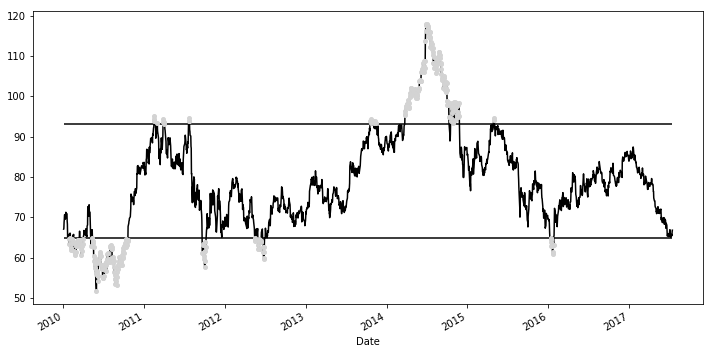

In [92]:
slb_close.plot(color='black', figsize=(12, 6))
slb_top_bottom_10.plot(marker='o', style=' ', ms=4, color='lightgray')
xmin = criteria.index[0]
xmax = criteria.index[-1]
import matplotlib.pyplot as plt
plt.hlines(y=[lower_10, upper_10], xmin=xmin, xmax=xmax, color='black')

- describe 메서드 결과는 그 자체로 요약 통계량을 인덱스 레이블로 갖는 Series다.
- 이 요약 Series는 그 자체 변수에 10%와 90% 분위수에 해당하는 값을 저장한다.

- Series와 DataFrmae은 모두 직접 그래프를 그릴 수 있는 plot 메서드를 갖고 있다.
- slb_close Series를 이용하여 검은색 선을 그리고 필터링된 slb_top_bottom_10으로 회색 점을 종가 위에 덮어 그린다.
- style 매개변수에는 공백을 설정해 라인이 그려지지 않도록 한다.
- ms는 marker의 크기를 설정한다.

- matplotlib에는 hline이라는 함수가 제공되는데 수평선을 그리는 기능을 갖고 있다.
- 이 함수는 y 값의 리스트를 입력으로 받아 xmin부터 xmax까지 그린다.

- matplotlib의 fill_between 함수를 사용해도 된다.
- 이 함수는 두 선 사이의 모든 영역을 칠한다.
- 이 함수의 where라는 매개변수에 불리언 Series를 지정하면 어느 영역을 칠할 것인지 정확히 설정해줄 수 있다.

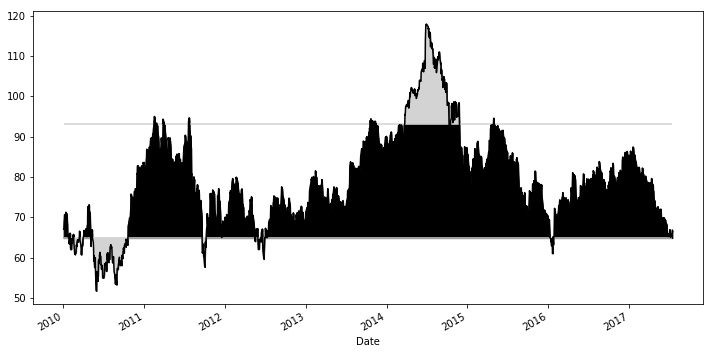

In [106]:
slb_close.plot(color='black', figsize=(12, 6))
plt.hlines(y=[lower_10, upper_10], xmin=xmin, xmax=xmax, color='lightgray')
plt.fill_between(x=criteria.index, y1=lower_10,
                 y2=slb_close.values, color='black')
plt.fill_between(x=criteria.index, y1=lower_10,
                 y2=slb_close.values, where=slb_close < lower_10, color='lightgray')
plt.fill_between(x=criteria.index, y1=upper_10,
                 y2=slb_close.values, where=slb_close > upper_10, color='lightgray')

## 7. SQL WHERE절 해석

```sql
SELECT
UNIQUE_ID,
DEPARTMENT
GENDER,
BASE_SALARY
FROM BMPLOYEE
WHERE DEPARTMENT IN ('Houston Police Department-HPD', 'Houston Fire Department (HFD)')
AND GENDER = 'Female'
AND BASE_SALARY BETWEEN 80000 AND 120000;
```

- employee 데이터셋을 읽어들인다.

In [107]:
employee = pd.read_csv('../data/employee.csv')

In [108]:
employee.head()

,UNIQUE_ID,POSITION_TITLE,DEPARTMENT,BASE_SALARY,RACE,EMPLOYMENT_TYPE,GENDER,EMPLOYMENT_STATUS,HIRE_DATE,JOB_DATE
0,0,ASSISTANT DIRECTOR (EX LVL),Municipal Courts Department,121862.0,Hispanic/Latino,Full Time,Female,Active,2006-06-12,2012-10-13
1,1,LIBRARY ASSISTANT,Library,26125.0,Hispanic/Latino,Full Time,Female,Active,2000-07-19,2010-09-18
2,2,POLICE OFFICER,Houston Police Department-HPD,45279.0,White,Full Time,Male,Active,2015-02-03,2015-02-03
3,3,ENGINEER/OPERATOR,Houston Fire Department (HFD),63166.0,White,Full Time,Male,Active,1982-02-08,1991-05-25
4,4,ELECTRICIAN,General Services Department,56347.0,White,Full Time,Male,Active,1989-06-19,1994-10-22


In [109]:
employee.DEPARTMENT.value_counts().head()

Houston Police Department-HPD     638
Houston Fire Department (HFD)     384
Public Works & Engineering-PWE    343
Health & Human Services           110
Houston Airport System (HAS)      106
Name: DEPARTMENT, dtype: int64

In [110]:
employee.GENDER.value_counts()

Male      1397
Female     603
Name: GENDER, dtype: int64

In [111]:
employee.BASE_SALARY.describe().astype(int)

count      1886
mean      55767
std       21693
min       24960
25%       40170
50%       54461
75%       66614
max      275000
Name: BASE_SALARY, dtype: int32

- SQL의 각 기준에 대해 하나씩 단일 문장을 작성한다.
- in은 isin으로 대체한다.

In [119]:
depts = ['Houston Police Department-HPD', 'Houston Fire Department (HFD)']
criteria_dept = employee.DEPARTMENT.isin(depts)
criteria_gender = employee.GENDER == 'Female'
criteria_sal = (employee.BASE_SALARY >= 80000) & (employee.BASE_SALARY <= 120000)

In [120]:
criteria_final = (criteria_dept &
                  criteria_gender &
                  criteria_sal)

In [121]:
select_columns = ['UNIQUE_ID', 'DEPARTMENT', 'GENDER', 'BASE_SALARY']

In [122]:
employee.loc[criteria_dept, select_columns].head()

,UNIQUE_ID,DEPARTMENT,GENDER,BASE_SALARY
2,2,Houston Police Department-HPD,Male,45279.0
3,3,Houston Fire Department (HFD),Male,63166.0
5,5,Houston Police Department-HPD,Male,66614.0
10,10,Houston Fire Department (HFD),Male,52644.0
14,14,Houston Police Department-HPD,Male,77076.0


In [123]:
employee.loc[criteria_gender, select_columns].head()

,UNIQUE_ID,DEPARTMENT,GENDER,BASE_SALARY
0,0,Municipal Courts Department,Female,121862.0
1,1,Library,Female,26125.0
35,35,Health & Human Services,Female,34923.0
36,36,Public Works & Engineering-PWE,Female,60258.0
38,38,Health & Human Services,Female,67499.0


- 최종적으로 SQL과 동일한 결과를 얻을 수 있다.

In [124]:
employee.loc[criteria_final, select_columns].head()

,UNIQUE_ID,DEPARTMENT,GENDER,BASE_SALARY
61,61,Houston Fire Department (HFD),Female,96668.0
136,136,Houston Police Department-HPD,Female,81239.0
367,367,Houston Police Department-HPD,Female,86534.0
474,474,Houston Police Department-HPD,Female,91181.0
513,513,Houston Police Department-HPD,Female,81239.0


- 급여 조건에 관한 불리언 Series는 between 함수를 이용하여 만들 수도 있다.

In [125]:
criteria_sal = employee.BASE_SALARY.between(80000, 120000)

- isin은 다른 pandas 문장과 조합하여 활용할 수 있다.
- 예를 들어 가장 빈번히 나타나는 부서 중 상위 5개에 속하는 모든 행을 제외해보자.

In [126]:
top_5_depts = employee.DEPARTMENT.value_counts().index[:5]

In [127]:
criteria = ~(employee.DEPARTMENT.isin(top_5_depts))

In [129]:
employee[criteria].head()

,UNIQUE_ID,POSITION_TITLE,DEPARTMENT,BASE_SALARY,RACE,EMPLOYMENT_TYPE,GENDER,EMPLOYMENT_STATUS,HIRE_DATE,JOB_DATE
0,0,ASSISTANT DIRECTOR (EX LVL),Municipal Courts Department,121862.0,Hispanic/Latino,Full Time,Female,Active,2006-06-12,2012-10-13
1,1,LIBRARY ASSISTANT,Library,26125.0,Hispanic/Latino,Full Time,Female,Active,2000-07-19,2010-09-18
4,4,ELECTRICIAN,General Services Department,56347.0,White,Full Time,Male,Active,1989-06-19,1994-10-22
18,18,MAINTENANCE MECHANIC III,General Services Department,40581.0,Hispanic/Latino,Full Time,Male,Active,2008-12-29,2008-12-29
32,32,SENIOR ACCOUNTANT,Finance,46963.0,Black or African American,Full Time,Male,Active,1991-02-11,2016-02-13


- pandas의 not 연산자 `~`는 Series의 모든 불리언 값을 반대로 만든다.








## 8. 주식 시장 수익률의 정규성 검정
## 9. query 메서드를 사용한 불리언 인덱싱 가독성 개선
## 10. where 메서드를 사용한 Series 보존
## 11. DataFrame row 마스크
## 12. 불리언, 정수 위치, 레이블을 사용한 선택